Decision Tree

장점 분석 결과가 이해가 쉽다
    분류데이터와 숫자 데이터 모두 사용가능

    
단점 많은 가능성을 가진 데이터셋에 비효율적 





Random Forest 

많은 decision Tree 를 조합한 앙상블 테크닉 
decision Tree의 단점을 보안하고 장점은 그대로 사용 

In [1]:
#Random Forest 

# n 개의 훈련 데이터에서 무작위 추출해 n개의 데이터셋을 만든다
#중복 추출이 가능하며 하나의 부트스트랩 샘플엔 대략 1/3 정도 누락시켜 만든다


#부트스트랩 : 일반적으로 한번 시작되면 알아서 진행되는 일련의 과정 
# ['']

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [3]:
x,y = make_moons(n_samples = 100, noise = 0.25 , random_state = 999)
print(x,y)

[[ 6.08796737e-01  4.58290736e-01]
 [ 5.62205134e-01 -1.79714083e-01]
 [ 1.73384864e-01  1.17945073e+00]
 [-7.94060477e-01  9.68100619e-01]
 [ 5.81198728e-02  8.26126666e-01]
 [-1.99007872e-01  1.10366674e+00]
 [ 9.44411154e-01  1.23295458e-01]
 [-1.05507651e+00  8.19293640e-01]
 [ 4.32167129e-01  3.86067837e-01]
 [ 2.95194982e-01  1.17240499e+00]
 [ 8.39384592e-01  8.68931310e-01]
 [ 1.49137453e-01  2.44770378e-01]
 [-7.76182543e-01  2.82301060e-01]
 [ 1.34817780e+00 -4.33595445e-01]
 [-1.32371242e+00  6.14339667e-01]
 [ 8.68937225e-01 -1.16535810e-01]
 [ 1.50908714e+00  5.23640945e-02]
 [ 1.16508792e+00 -4.59642911e-03]
 [-4.47062340e-01  9.88434676e-01]
 [ 1.67158064e+00 -2.91377516e-01]
 [ 9.28201208e-01  4.24101948e-01]
 [-1.10789368e+00  5.93494495e-01]
 [ 1.54903757e-02  7.97648740e-01]
 [ 5.90367723e-01  1.00390468e+00]
 [-1.21347836e+00  1.27563322e-02]
 [ 7.11044839e-01 -3.32069923e-02]
 [-8.69175725e-01  3.99090145e-01]
 [ 3.48095871e-01 -1.01191706e-01]
 [ 8.31559824e-01 -7

In [4]:
#train , test : 7 : 3 

X_train,X_test,y_train,y_test = train_test_split(x,y, test_size = 0.3 , random_state=999)



In [5]:
len(X_train) , len(X_test)

(70, 30)

In [6]:
X_train[0]

array([ 0.62313155, -0.42924984])

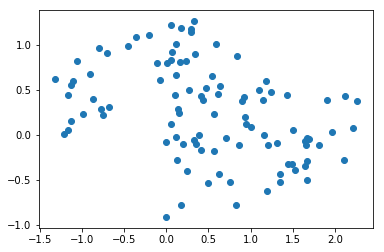

In [7]:
plt.scatter(x[:,0],x[:,1])

In [8]:
model = RandomForestClassifier(n_estimators = 19 , random_state=999)
model.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=19, n_jobs=None,
            oob_score=False, random_state=999, verbose=0, warm_start=False)

In [9]:
model.score(X_train,y_train)

1.0

In [10]:
model.score(X_test,y_test)

0.9

0
AxesSubplot(0.125,0.71587;0.133621x0.16413)
1
AxesSubplot(0.285345,0.71587;0.133621x0.16413)
2
AxesSubplot(0.44569,0.71587;0.133621x0.16413)
3
AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4
AxesSubplot(0.766379,0.71587;0.133621x0.16413)
5
AxesSubplot(0.125,0.518913;0.133621x0.16413)
6
AxesSubplot(0.285345,0.518913;0.133621x0.16413)
7
AxesSubplot(0.44569,0.518913;0.133621x0.16413)
8
AxesSubplot(0.606034,0.518913;0.133621x0.16413)
9
AxesSubplot(0.766379,0.518913;0.133621x0.16413)
10
AxesSubplot(0.125,0.321957;0.133621x0.16413)
11
AxesSubplot(0.285345,0.321957;0.133621x0.16413)
12
AxesSubplot(0.44569,0.321957;0.133621x0.16413)
13
AxesSubplot(0.606034,0.321957;0.133621x0.16413)
14
AxesSubplot(0.766379,0.321957;0.133621x0.16413)
15
AxesSubplot(0.125,0.125;0.133621x0.16413)
16
AxesSubplot(0.285345,0.125;0.133621x0.16413)
17
AxesSubplot(0.44569,0.125;0.133621x0.16413)
18
AxesSubplot(0.606034,0.125;0.133621x0.16413)


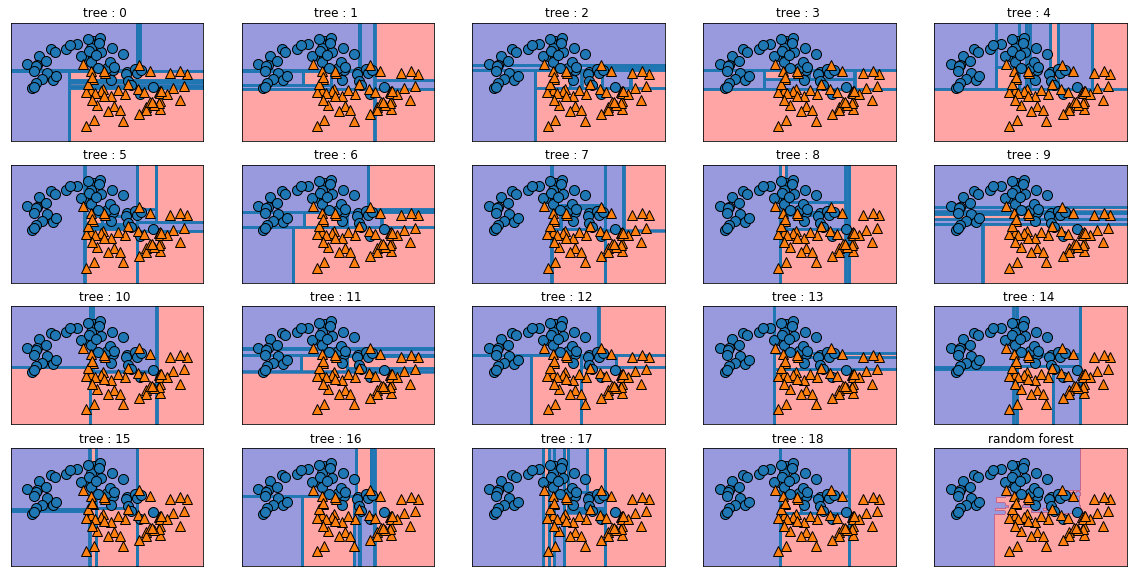

In [13]:
import mglearn
fig, axes = plt.subplots(4,5,figsize = (20,10))

for i , (ax,tree) in enumerate(zip(axes.ravel(), model.estimators_)):
    print(i)
    print(ax)
    ax.set_title("tree : {} " .format(i))
    mglearn.plots.plot_tree_partition(x,y,tree,ax=ax)
    
    
mglearn.plots.plot_2d_separator(model,x,fill=True,ax=axes[-1,-1],alpha = 0.4)
axes[-1,-1].set_title('random forest')

mglearn.discrete_scatter(x[:,0],x[:,1],y)

    